In [1]:
from modsim import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [2]:
degrees= UNITS.degrees

In [3]:
mkm= 1/1000

sechour= (1/60)**2 

mass_sun= 1.989e30 
G= 6.673e-11 * mkm**3 
mass_toast= 1
S_B_const= 5.67e-8 
temp_S= 5772 
area_t= .01 *mkm**2
r_s= 695770 *1000 *mkm
Pow_s= 3.9e26 
Q_b= .008/273 




num_G = G* mass_sun   

num_G

dist_init= 1e10

VXinit= sqrt(2*num_G/dist_init)



G
 

#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

6.673e-20

In [20]:

condition= Condition(x0= 0, y0= -1e15, velocity= 250, angle = 20*degrees, duration= 1e10, T0= 0 )

In [21]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    
    
    vx, vy = pol2cart(theta, velocity)
    
    init= State(x=x0, y=y0, vx= vx, vy= vy)
    area_toast = area_t 
    
    ts= linspace(0, duration, 100)
    
    return System(init= init, mass= mass_toast, area_t= area_t, T= T0, Q_b= Q_b, ts= ts)

system= make_system(condition) 




In [22]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    
    unpack(system)
    P= Vector(-x, -y) 
    V= Vector(vx, vy) 
    
    
    tan_dir= Vector(-y, x)/ sqrt(x**2+ y**2)
    w= V.proj(tan_dir) / tan_dir.mag
    xdir= -x/sqrt(x**2+y**2)
    ydir= -y/sqrt(x**2+y**2)
    
    wx= w.x
    wy= w.y
    

    F_grav= (G* mass_sun *mass_toast/ (sqrt(x**2+y**2)))  
    
    
    a_grav= Vector(xdir, ydir) *((F_grav)/mass_toast) 
    a_cent= Vector(wx, wy) * ((wx**2+wy**2) / (sqrt(x**2+y**2)))  
    #print(a_cent, a_grav)
    
    ax= a_grav.x + a_cent.x
    ay= a_grav.y + a_cent.y

    
    rad_on_toast= t * Pow_s * r_s**2/ P.mag**2 
    temp_toast= rad_on_toast/ Q_b / mass_toast 
    
    
    return vx, vy, ax, ay
    
    
    
slope_func(system.init,1,system)
    

(<Quantity(234.9231551964771, 'dimensionless')>,
 <Quantity(85.50503583141717, 'dimensionless')>,
 <Quantity(1.2965147899834865e-08, 'dimensionless')>,
 <Quantity(0.00013272597, 'dimensionless')>)

In [23]:

run_odeint(system, slope_func)

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [24]:
system.results

,x,y,vx,vy
0.000000e+00,0.000000e+00,-1.000000e+15,2.349232e+02,8.550504e+01
1.010101e+08,2.379079e+10,-9.993142e+14,2.360856e+02,1.349525e+04
2.020202e+08,4.768425e+10,-9.972731e+14,2.369568e+02,2.692332e+04
3.030303e+08,7.165116e+10,-9.938739e+14,2.375403e+02,4.038807e+04
4.040404e+08,9.566257e+10,-9.891120e+14,2.378381e+02,5.390824e+04
5.050505e+08,1.196897e+11,-9.829808e+14,2.378511e+02,6.750309e+04
6.060606e+08,1.437037e+11,-9.754718e+14,2.375786e+02,8.119262e+04
7.070707e+08,1.676757e+11,-9.665744e+14,2.370191e+02,9.499781e+04
8.080808e+08,1.915766e+11,-9.562757e+14,2.361701e+02,1.089408e+05
9.090909e+08,2.153770e+11,-9.445607e+14,2.350285e+02,1.230453e+05


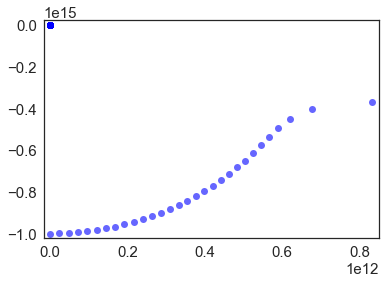

In [25]:
plot(system.results.x, system.results.y, "bo")
#plt.axis([-6e10, 6e10, -1.2e10, 1.2e10])